DATA 620 Project 1 (Week 5)
Lin Li and Tony Mai

1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

In [29]:
from operator import itemgetter 
import numpy as np
import pandas as pd
import networkx as nx
import random
from matplotlib import pyplot as plt

In [30]:
# load gml of coappearances of characters in Victor Hugo's novel "Les Miserables"
G = nx.read_gml('lesmis.gml', label='label')

In [31]:
# observe network info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


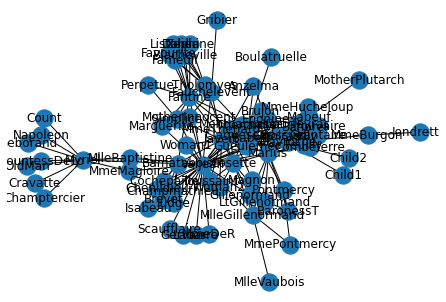

In [32]:
# graph newwork
nx.draw(G, with_labels = True)
plt.show(G)

In [33]:
# explore nodes 
nodes = list(G.nodes(data=True))
nodes[:10]

[('Myriel', {'gender': 'male'}),
 ('Napoleon', {'gender': 'male'}),
 ('MlleBaptistine', {'gender': 'female'}),
 ('MmeMagloire', {'gender': 'female'}),
 ('CountessDeLo', {'gender': 'male'}),
 ('Geborand', {'gender': 'male'}),
 ('Champtercier', {'gender': 'male'}),
 ('Cravatte', {'gender': 'male'}),
 ('Count', {'gender': 'male'}),
 ('OldMan', {'gender': 'male'})]

In [46]:
# calculate degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# convert dictionary to dataframe
df_degree_centrality = pd.DataFrame.from_dict(degree_centrality, orient='index')
#df_degree_centrality
# get top 10 degree centrality values
df_degree_centrality.sort_values(by=[0])

,0
MlleVaubois,0.013158
Gribier,0.013158
Scaufflaire,0.013158
MotherPlutarch,0.013158
Gervais,0.013158
...,...
Thenardier,0.210526
Javert,0.223684
Marius,0.250000
Gavroche,0.289474


In [48]:
# calculate eigenvector centrality of each node

eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)

# convert dictionary to dataframe
df_eigenvector_centrality = pd.DataFrame.from_dict(eigenvector_centrality, orient='index')

# get top 10 eigenvector centrality values
df_eigenvector_centrality.sort_values(by=[0])

,0
Jondrette,0.002220
Count,0.002343
Napoleon,0.002343
CountessDeLo,0.002343
Geborand,0.002343
...,...
Bossuet,0.242131
Marius,0.259111
Enjolras,0.267179
Valjean,0.267618


In [13]:
# select nodes gender = male
selected_nodes_male = [n for n,v in G.nodes(data=True) if v['gender'] == 'male']  
print (selected_nodes_male)

['Myriel', 'Napoleon', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Thenardier', 'Javert', 'Fauchelevent', 'Bamatabois', 'Scaufflaire', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Gribier', 'Gavroche', 'Gillenormand', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Brujon', 'MmeHucheloup']


In [14]:
# select nodes gender = female
selected_nodes_female = [n for n,v in G.nodes(data=True) if v['gender'] == 'female']  
print (selected_nodes_female)

['MlleBaptistine', 'MmeMagloire', 'Marguerite', 'MmeDeR', 'Isabeau', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Cosette', 'Perpetue', 'Simplice', 'Woman1', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Jondrette', 'MmeBurgon', 'Magnon', 'MotherPlutarch', 'Toussaint', 'Child1', 'Child2']


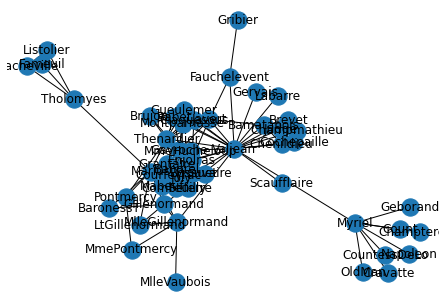

In [15]:
# graph coappearances of male characters
H_male = G.subgraph(selected_nodes_male)
nx.draw(H_male,with_labels=True)
plt.show(H_male)

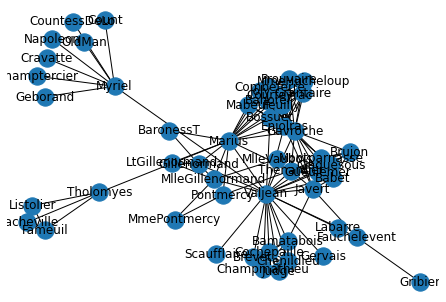

In [16]:
## graph coappearances of female characters
H_female = G.subgraph(selected_nodes_male)
nx.draw(H_female,with_labels=True)
plt.show(H_female)

In [49]:
# group centrality for female characters
nx.group_degree_centrality(G, selected_nodes_female)

0.43137254901960786

In [50]:
# group centrality for male characters
nx.group_degree_centrality(G, selected_nodes_male)

0.9230769230769231